# MINI PROJECT2 ---- Predicting the Insurance Cost--------by SadviSandhya

### Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0,9.0)
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso 

### Importing dataset
Dataset includes 1,338 examples of beneficiaries currently enrolled in the insurance plan, with features indicating characteristics of the patient as well as the total medical expenses charged to the plan for the calendar year. 

The features are:

--age: Age of the primary beneficiary. 

--sex: The policy holder’s gender.

--bmi: The body mass index (BMI)

--children: The number of children/dependents covered by the insurance plan

--smoker: A yes or no

--region: (The beneficiary’s place of residence in the US, divided into four geographic regions: northeast, southeast,southwest, or northwest.)

--charges :Individual medical costs billed by health insurance.


In [7]:
#To read the file and check few data
med_df = pd.read_csv('insurance.csv')
med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,18,male,33.770,1,no,southeast,1725.55230
1,28,male,33.000,3,no,southeast,4449.46200
2,33,male,22.705,0,no,northwest,21984.47061
3,32,male,28.880,0,no,northwest,3866.85520
4,31,female,25.740,0,no,southeast,3756.62160


In [8]:
med_df.shape

(1338, 7)

In [9]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#checking for null values
med_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###### Dataset has 1338 rows and 7 columns.
###### There seems to be some fields that are categorical in nature, but in integer/float type.

In [11]:
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Dataset details

- Dataset has 1338 rows and 7 columns.
- There seems to be some fields that are categorical in nature, but in integer/float type.
- Age has minimum value as 18. Hence this data only has information about adults.
- 50% of people have 1 or less children and 75% of people have 2 or less children.
- The average, medical cost is USD 13,270 with a median value of USD 9382.

## Data Visualization

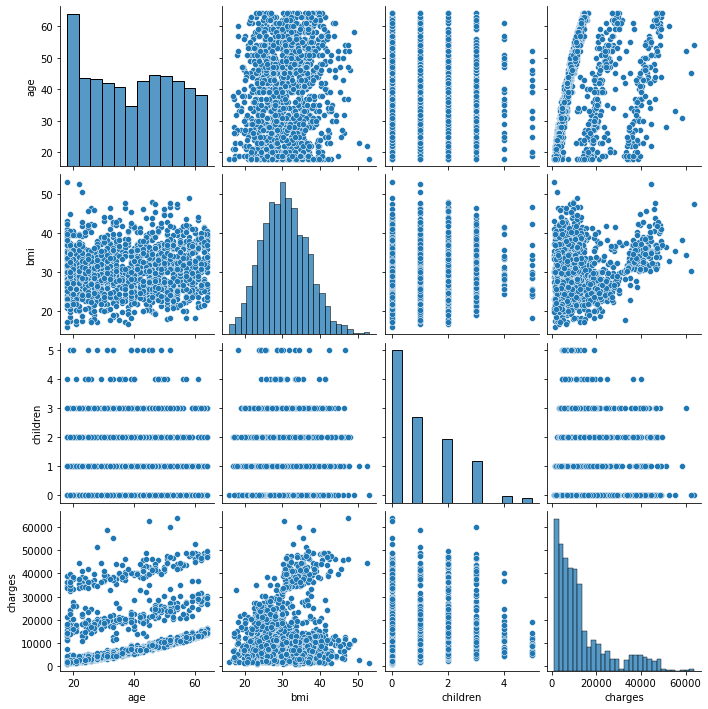

In [12]:
sns.pairplot(med_df)

In [13]:
#numerical dtypes
#plt.figure(figsize=(6,6))
#sns.heatmap(med_df.corr(),annot=True,cmap='YlGnBu')
#plt.show()
#med_df.corr()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

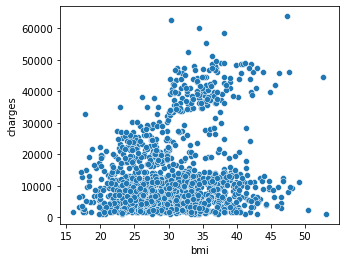

In [14]:
#shows smoker paid more charges
plt.figure(figsize=(5,4))
sns.scatterplot(x='bmi', y='charges', data= med_df)

####  Distribution of categorical columns

Text(0.5, 1.0, 'Box plot of Charges for smoker and non smoker')

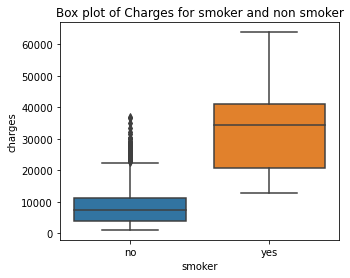

In [15]:
#shows smoker paid more charges
plt.figure(figsize=(5,4))
sns.boxplot(x='smoker', y='charges', data= med_df)
plt.title('Box plot of Charges for smoker and non smoker')

Text(0.5, 1.0, 'Box plot of Charges for male and female')

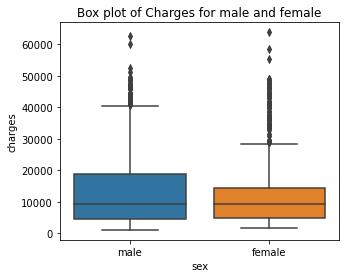

In [16]:
#box plot shows that male has paid more charges
plt.figure(figsize=(5,4))
sns.boxplot(x='sex',y='charges',data=med_df)
plt.title('Box plot of Charges for male and female')

Text(0.5, 1.0, 'Box plot of Charges in 4 regions of US')

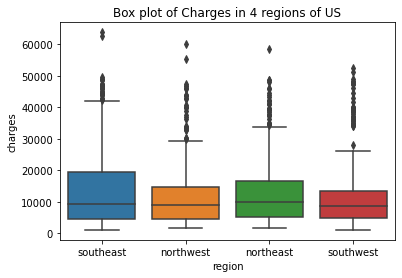

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='region', y='charges', data= med_df)
plt.title('Box plot of Charges in 4 regions of US')

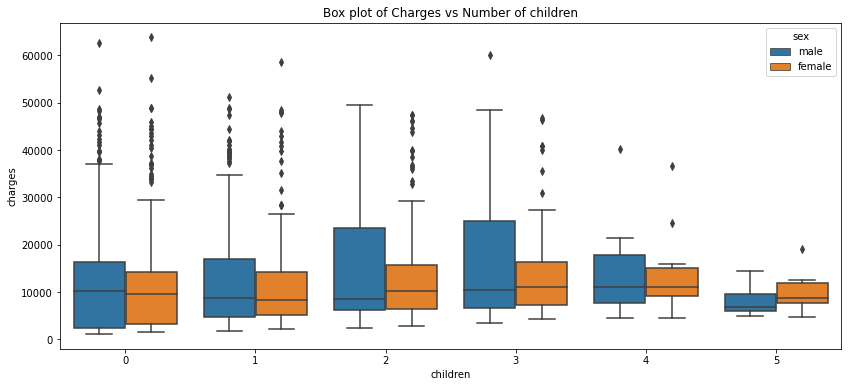

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=med_df)
plt.title('Box plot of Charges vs Number of children');

## Creating Dummy Variables

-Create DUMMY variables for 4 categorical variables 'sex','children','smoker' & 'region'.

In [19]:
# Check the datatypes before convertion
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
from sklearn.preprocessing import LabelEncoder
#Variables can be either dichotomous, nominal, or ordinal.

le = LabelEncoder()
#region
le.fit(med_df.region.drop_duplicates()) 
med_df.region = le.transform(med_df.region)
#sex
le = LabelEncoder()
le.fit(med_df.sex.drop_duplicates()) 
med_df.sex = le.transform(med_df.sex)
# smoker & nonsmoker
le.fit(med_df.smoker.drop_duplicates()) 
med_df.smoker = le.transform(med_df.smoker)

In [21]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [22]:
med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,18,1,33.770,1,0,2,1725.55230
1,28,1,33.000,3,0,2,4449.46200
2,33,1,22.705,0,0,1,21984.47061
3,32,1,28.880,0,0,1,3866.85520
4,31,0,25.740,0,0,2,3756.62160


In [23]:
med_df.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

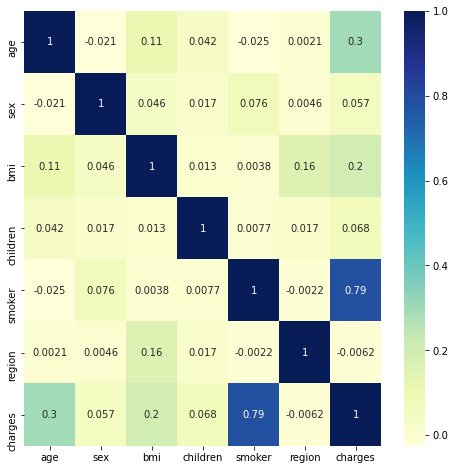

In [24]:
#correlation heat map 
f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(med_df.corr(), annot=True, cmap='YlGnBu')

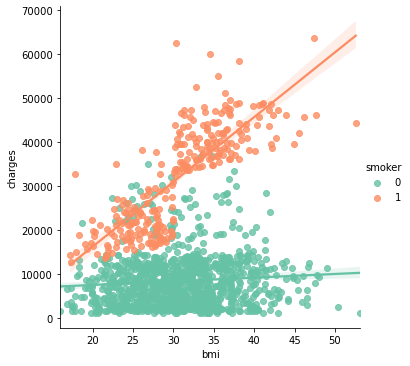

In [25]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=med_df, palette="Set2")

### Feature Selection and splitting data

- #Target and predictor variable #Splitting the dataset into the Training set and Test setSplitting the data into train and test(80:20), - Forward Feature Selection

In [26]:
#target variable charges, rest of the coumns predictor variables

y = med_df['charges']

# Take all columns except target as predictor columns
predictor_columns = [c for c in med_df.columns if c != 'charges']
# Load the dataset as a pandas data frame
X = pd.DataFrame(med_df, columns = predictor_columns)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
## Flag intermediate output
show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [29]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression() # create a model for Linear Regression
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train) 
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1)) / (n -k - 1))
                           
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = region, bmi, smoker, sex, children, age
(Step) Trying region...
(Step) - Features = region
(Step) - Adjusted R^2: This = -0.004; Best = 0.000
(Step) Trying bmi...
(Step) - Features = bmi
(Step) - Adjusted R^2: This = 0.034; Best = 0.000
(Step) - New Best!   : Feature = bmi; R^2 = 0.038; Adjusted R^2 = 0.034
(Step) Trying smoker...
(Step) - Features = smoker
(Step) - Adjusted R^2: This = 0.620; Best = 0.034
(Step) - New Best!   : Feature = smoker; R^2 = 0.621; Adjusted R^2 = 0.620
(Step) Trying sex...
(Step) - Features = sex
(Step) - Adjusted R^2: This = -0.003; Best = 0.620
(Step) Trying children...
(Step) - Features = children
(Step) - Adjusted R^2: This = -0.001; Best = 0.620
(Step) Trying age...
(Step) - Features = age
(Step) - Adjusted R^2: This = 0.100; Best = 0.620
Added feature smoker with R^2 = 0.621 and adjusted R^2 = 0.620

(Step) Excluded = region, sex, bmi, children, age
(Step) Trying region...
(Step) - Features = smoker, region
(Step) - Adjusted R^2: Thi

### Modelling 
LinearRegression

In [30]:
#linear Reg model1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Creating the linear regressor
#r2,rmse,test predict

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
r2_train=reg.score(X_train,y_train)
r2_test=reg.score(X_test,y_test)
train_predict= lr.predict(X_train)
test_predict = lr.predict(X_test) 
rmse_train = (np.sqrt(mean_squared_error(y_train,train_predict)))
#rmse linear
mse_test = mean_squared_error(y_test,test_predict)
rmse_test = (np.sqrt(mean_squared_error(y_test, test_predict)))

In [31]:
#Coefficients
print(lr.coef_)
print(lr.intercept_)

[  253.74982906  -318.55380108   328.11614594   402.7616341
 23928.02977869  -351.38980238]
-11397.042738604492


In [32]:
#R2 score and RMSE from Linear regression model
print('R2_score (train): ', r2_train)
print('R2_score (test): ', r2_test)
print("RMSE: ", rmse_test)

R2_score (train):  0.7485948298923839
R2_score (test):  0.7590952318557411
RMSE:  5756.398129425177


In [33]:
#Plot and view coefficients
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

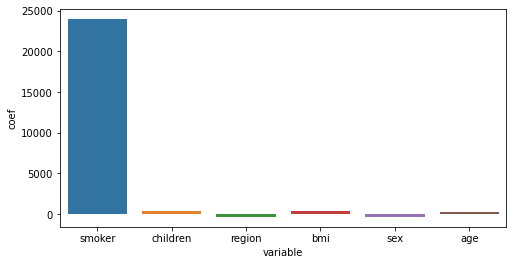

In [34]:
plt.figure(figsize=(8,4))
view_coeff(X, lr)

In [35]:
med_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [36]:
# taking the features from forward feature selection smoker, age, bmi, children, region

med_predictor = ['age','bmi', 'children','smoker','region']
X1 =med_df[med_predictor]
y1= med_df['charges']
X1.head()

,age,bmi,children,smoker,region
0,18,33.770,1,0,2
1,28,33.000,3,0,2
2,33,22.705,0,0,1
3,32,28.880,0,0,1
4,31,25.740,0,0,2


In [37]:
#model 2 
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [38]:
#Linear regression model2 with selected features 'age','bmi', 'children','smoker','region'
lr1 = LinearRegression()
reg1 = lr1.fit(X1_train, y1_train)
r2_train1=reg1.score(X1_train,y1_train)
r2_test1=reg1.score(X1_test,y1_test)
train_predict1= lr1.predict(X1_train)
test_predict1 = lr1.predict(X1_test) 
rmse_train1 = (np.sqrt(mean_squared_error(y1_train,train_predict1)))
#rmse linear
rmse_test1 = (np.sqrt(mean_squared_error(y1_test, test_predict1)))

In [39]:
##R2 score and RMSE from Linear regression model2
print('R2_score (test): ', r2_test1)
print("RMSE: ", rmse_test1)

R2_score (test):  0.7599681774973733
RMSE:  5745.959184716767


In [40]:
#Coefficients- Linear regression model2
print(lr1.coef_)
print(lr1.intercept_)

[  254.04451579   326.90063913   398.6281035  23905.23116734
  -351.86358501]
-11517.471917881698


### Modelling
RidgeRegression

In [41]:
#ridge regression #r2,rmse,test predict
from sklearn.linear_model import Ridge

Ridge = Ridge(alpha=0.1)
Ridge.fit(X_train, y_train)

y_pred_ridge_test = Ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge_test)
rmse_ridge =(np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
r2_score_ridge_train = Ridge.score(X_train, y_train) 
r2_score_ridge_test = Ridge.score(X_test, y_test)

print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(X_test, y_test))

-11394.381652338912
[  253.75346818  -317.78758831   328.10873697   402.70445605
 23914.09965606  -351.4411457 ]
0.759112103920507


### Modelling
Lasso Regression

In [42]:
from sklearn.linear_model import Lasso

Lasso = Lasso(alpha=0.1)
Lasso.fit(X_train, y_train)

y_pred_lasso_test = Lasso.predict(X_test)
r2_score_lasso_train = Lasso.score(X_train, y_train) 
r2_score_lasso_test = Lasso.score(X_test, y_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso_test)
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))

print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(X_test, y_test))

-11396.98023885197
[  253.7502202   -318.11586169   328.10952018   402.6850609
 23927.38010794  -351.30742393]
0.7590966931308188


##### Measuring Error    

In [43]:
mod_data = [('Linear Regression',mse_test, rmse_test,r2_test),
          ('Ridge Regression',mse_ridge, rmse_ridge,r2_score_ridge_test),
          ('Lasso Regression',mse_lasso, rmse_lasso, r2_score_lasso_test),
         ]

In [44]:
# Metrics
concl = pd.DataFrame(data =mod_data, columns=['Model', 'MSE', 'RMSE', 'R2_Score(test)'])
concl

,Model,MSE,RMSE,R2_Score(test)
0,Linear Regression,3.313612e+07,5756.398129,0.759095
1,Ridge Regression,3.313380e+07,5756.196548,0.759112
2,Lasso Regression,3.313592e+07,5756.380671,0.759097


In [45]:
#Predicted values using Linear regression
y_pred = lr.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Actual Values"])
pd.concat([y_test_df , y_pred_df] , axis=1)

,Actual Values,Predicted Values
0,11534.87265,8764.153252
1,8605.36150,6885.814635
2,2396.09590,2162.776266
3,36898.73308,27661.337571
4,18955.22017,2694.789380
...,...,...
263,5138.25670,9207.957548
264,12146.97100,11937.780414
265,6500.23590,8234.074763
266,10156.78320,9096.564614


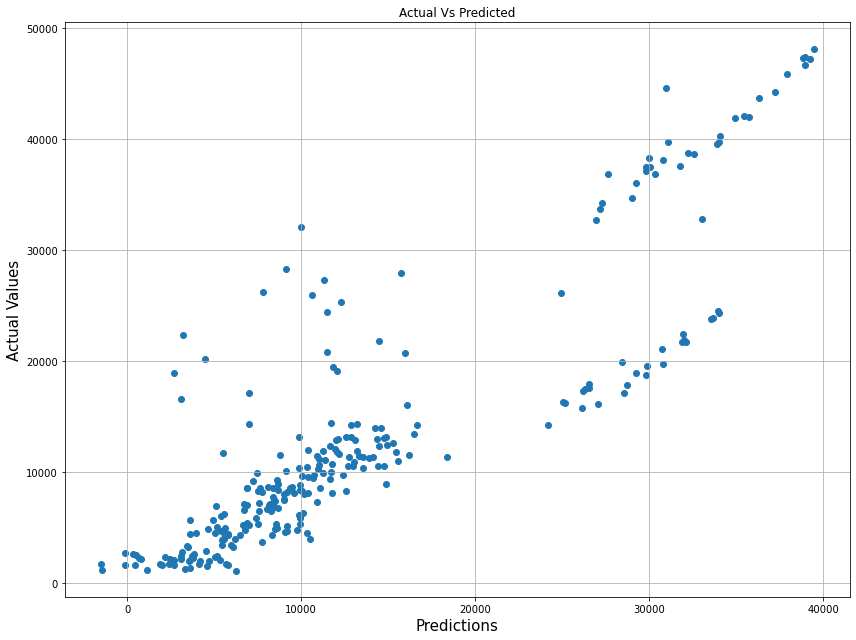

In [46]:
fig, ax = plt.subplots()

ax.scatter(lr.predict(X_test), y_test)
ax.set_xlabel('Predictions', fontsize=15)
ax.set_ylabel('Actual Values',fontsize=15)
ax.set_title('Actual Vs Predicted')

ax.grid(True)
fig.tight_layout()

plt.show()

In [47]:
## Calculate Ridge Regression model-regularisation
from sklearn.linear_model import Ridge

clf = Ridge()
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-4, 10, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, lr.coef_))

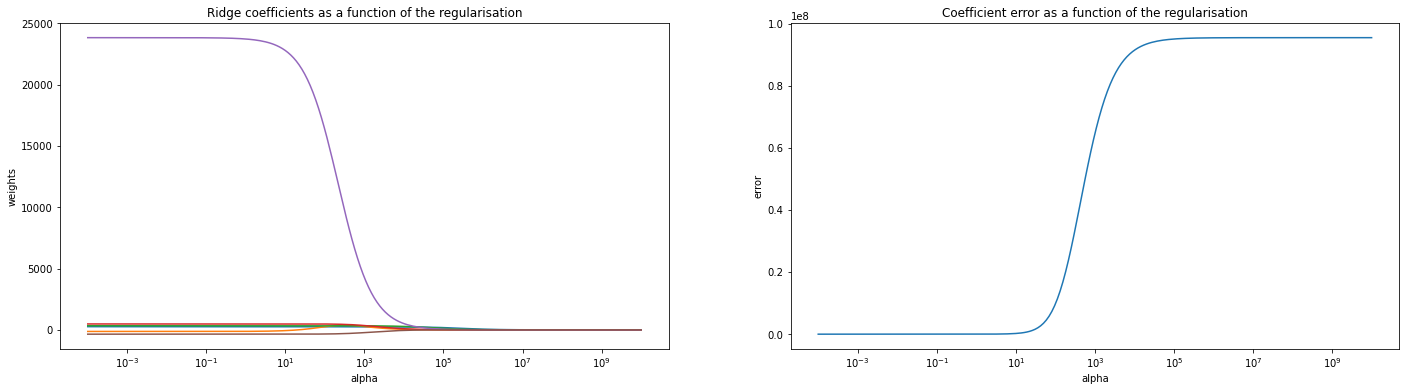

In [48]:
# Display results
plt.figure(figsize = (24, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [49]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 0.3292971255097151
Score: 0.7507357567855012


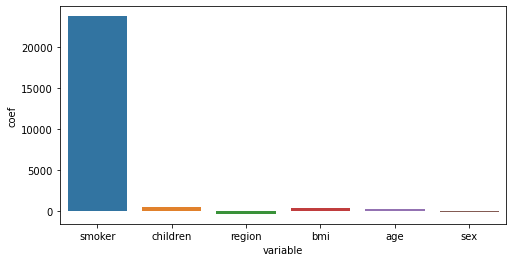

In [58]:
plt.figure(figsize=(8,4))
view_coeff(X, optimal_ridge)

In [51]:
## Calculate Lasso Regression model
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha=0.1)

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in lasso_alphas:
    reg_lasso.set_params(alpha = a)
    reg_lasso.fit(X, y)
    coefs.append(reg_lasso.coef_)
    errors.append(mean_squared_error(reg_lasso.coef_, lr.coef_))

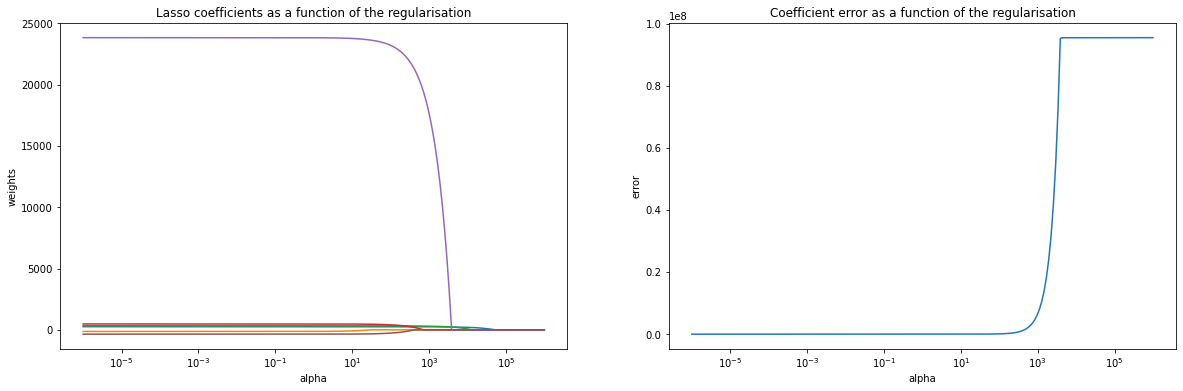

In [52]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [53]:
from sklearn.linear_model import LassoCV
# Find Optimal Lasso Using LassoCV
opt_lasso = LassoCV(alphas=lasso_alphas, cv=10)
opt_lasso.fit(X, y)
print('Alpha:', opt_lasso.alpha_)
print('Score:', opt_lasso.score(X, y))

Alpha: 45.52935074866948
Score: 0.750598895310955


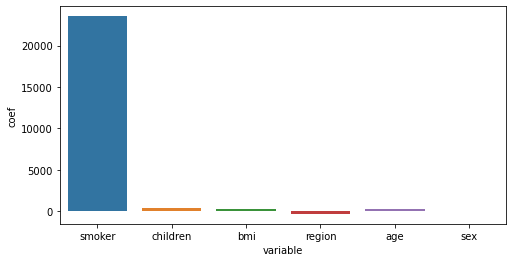

In [59]:
# Plot Coefficient
plt.figure(figsize=(8,4))
view_coeff(X, opt_lasso)

In [55]:
# Build the ridge and lasso using optimal alpha
ridge_final = Ridge(alpha = optimal_ridge.alpha_)
lasso_final = Lasso(alpha = opt_lasso.alpha_)

# Need to fit the Lasso and Ridge outside of cross_val_score like we did with the ridge
ridge_final.fit(X,y)
lasso_final.fit(X,y)

Lasso(alpha=45.52935074866948)

In [56]:
ridge_res= y - ridge_final.predict(X)
lasso_res= y - lasso_final.predict(X) 

C:\Users\sthut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


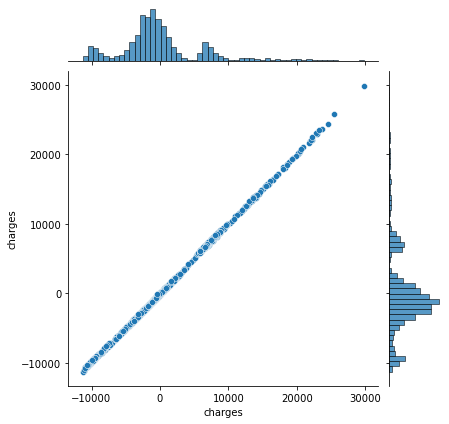

In [57]:
# Jointplot
sns.jointplot(ridge_res,lasso_res)